<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/part_2_simulation_master_project_alitalebi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

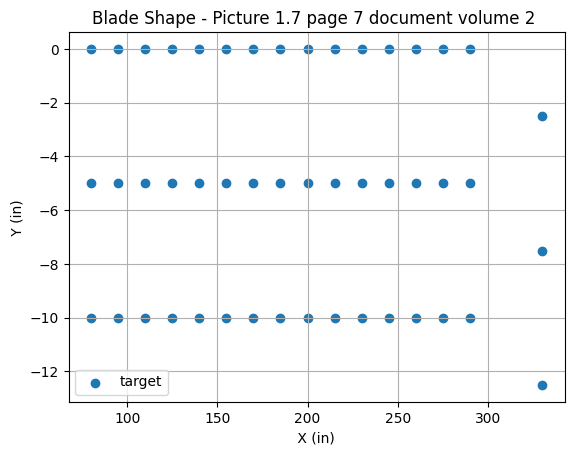

In [2]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [3]:
dict_28_24_blade_1 = {"r/R":[0.2001 , 0.2499 ,0.2998 , 0.3498 , 0.3913 , 0.4496 , 0.4997 , 0.5387 , 0.5996 , 0.6498 , 0.6998 , 0.7500 , 0.8001 , 0.8497 , 0.9102 , 0.9734 ] ,
              "Delta XMean (in.)" : [-0.0045 , -0.0011 , -0.0281 , -0.0177 , -0.0113 , -0.0186 , -0.0133 , -0.0232 , -0.0338 , -0.0307 , -0.0633 , -0.0773 , -0.0811 , -0.1920 , -0.2623 , -0.2629 ] ,
              "Delta XStd (in.)"  : [0.0010 , 0.0009 , 0.0011 , 0.0011 , 0.0016 , 0.0019 , 0.0022 , 0.0020 , 0.0019 , 0.0023 , 0.0021 , 0.0021 , 0.0021 , 0.0022 , 0.0023 , 0.0026 ] ,
              "Delta YMean (in.)" : [-0.0132 , -0.0225 , -0.0483 , -0.0939 , -0.1256 , -0.1809 , -0.2209 , -0.2510 , -0.3087 , -0.3422 , -0.3874 , -0.4184 , -0.5123 , -0.5296 , -0.5487 , -0.5354 ] ,
              "Delta YStd (in.)"  : [0.0007 , 0.0013 , 0.0028 , 0.0046 , 0.0066 , 0.0088 , 0.0111 , 0.0126 , 0.0150 , 0.0176 , 0.0201 , 0.0229 , 0.0258 , 0.0284 , 0.0313 , 0.0350 ]  ,
              "Delta ZMean (in.)" : [-0.0050 , -0.0010 , -0.0251  ,-0.0442 , -0.0622 , -0.1306 , -0.2121 , -0.3077 , -0.4860 , -0.7122 , -0.9213 , -1.1503 , -1.3874 , -1.7166 , -2.1240 , -2.5162 ] ,
              "Delta ZStd (in.)"  : [0.0023 , 0.0046 , 0.0089 , 0.0145 , 0.0211 , 0.0267 , 0.0347 , 0.0404 , 0.0480 , 0.0540 , 0.0607 , 0.0666 , 0.0718 , 0.0784 , 0.0857 , 0.0943 ]

}


table_28_24_blade_1 = pd.DataFrame(dict_28_24_blade_1)

In [4]:
table_28_24_blade_1

r/R  Delta XMean (in.)  Delta XStd (in.)  Delta YMean (in.)  \
0   0.2001            -0.0045            0.0010            -0.0132   
1   0.2499            -0.0011            0.0009            -0.0225   
2   0.2998            -0.0281            0.0011            -0.0483   
3   0.3498            -0.0177            0.0011            -0.0939   
4   0.3913            -0.0113            0.0016            -0.1256   
5   0.4496            -0.0186            0.0019            -0.1809   
6   0.4997            -0.0133            0.0022            -0.2209   
7   0.5387            -0.0232            0.0020            -0.2510   
8   0.5996            -0.0338            0.0019            -0.3087   
9   0.6498            -0.0307            0.0023            -0.3422   
10  0.6998            -0.0633            0.0021            -0.3874   
11  0.7500            -0.0773            0.0021            -0.4184   
12  0.8001            -0.0811            0.0021            -0.5123   
13  0.8497            -0.1920            0.0022            -0.5296   
14  0.9102            -0.2623            0.0023            -0.5487   
15  0.9734            -0.2629            0.0026            -0.5354   

    Delta YStd (in.)  Delta ZMean (in.)  Delta ZStd (in.)  
0             0.0007            -0.0050            0.0023  
1             0.0013            -0.0010            0.0046  
2             0.0028            -0.0251            0.0089  
3             0.0046            -0.0442            0.0145  
4             0.0066            -0.0622            0.0211  
5             0.0088            -0.1306            0.0267  
6             0.0111            -0.2121            0.0347  
7             0.0126            -0.3077            0.0404  
8             0.0150            -0.4860            0.0480  
9             0.0176            -0.7122            0.0540  
10            0.0201            -0.9213            0.0607  
11            0.0229            -1.1503            0.0666  
12            0.0258            -1.3874            0.0718  
13            0.0284            -1.7166            0.0784  
14            0.0313            -2.1240            0.0857  
15            0.0350            -2.5162            0.0943

Mse is :  0.0807442055878764
-0.783915728997392 -0.7328403567852574 0.04545409590735853
Formula : z = -0.783915728997392+-0.7328403567852574x+0.04545409590735853y


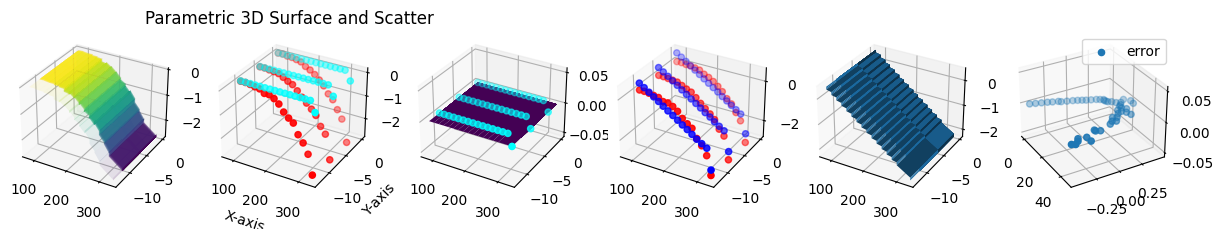

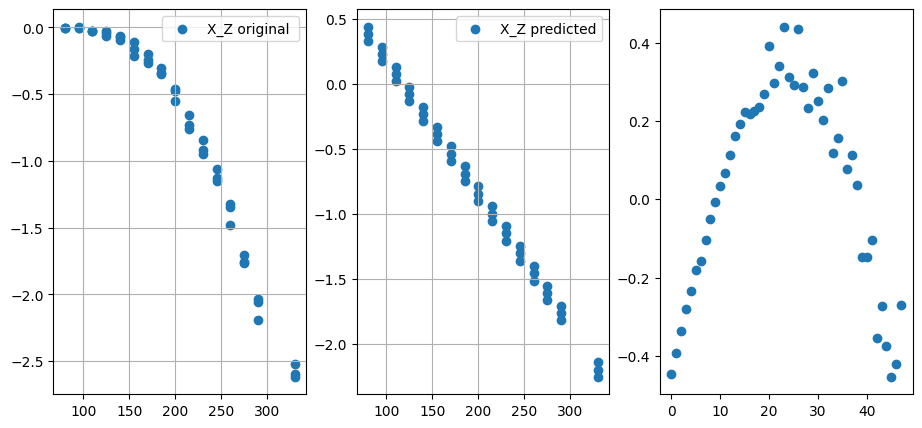

//////// ******************** ///////
Mse is :  0.09305302160512051
-0.7309304734443843 -0.7219442095043935 0.05266010066975181
Formula : z = -0.7309304734443843+-0.7219442095043935x+0.05266010066975181y


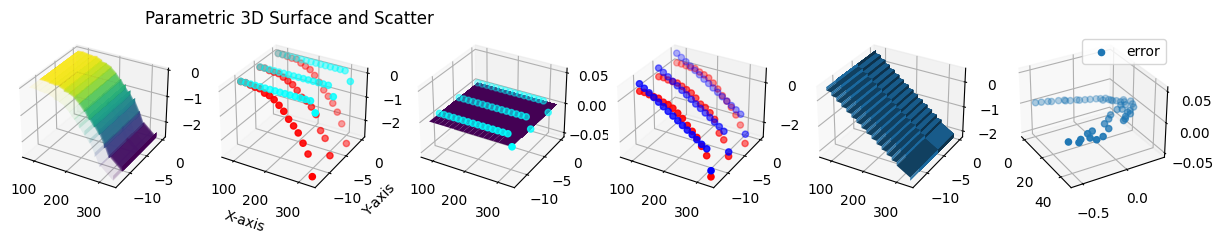

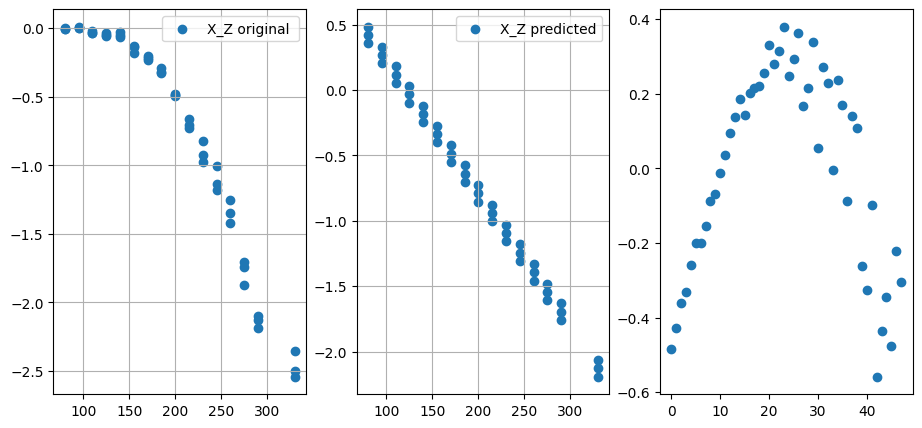

//////// ******************** ///////
Mse is :  0.09339301958410022
-0.718763754826041 -0.7411763940178149 -0.03105494821173945
Formula : z = -0.718763754826041+-0.7411763940178149x+-0.03105494821173945y


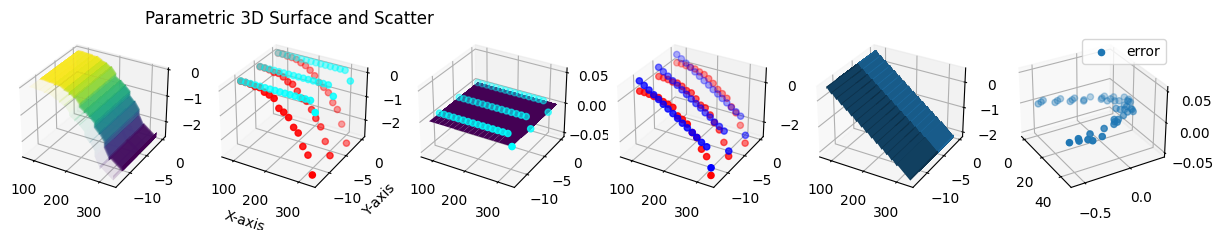

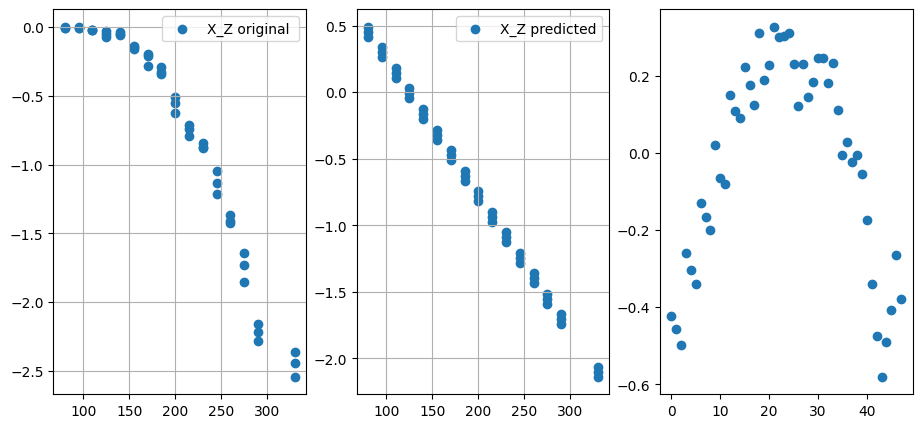

//////// ******************** ///////
Mse is :  0.11585306358330018
-0.7221567756017718 -0.8105026521259153 0.03896589240761221
Formula : z = -0.7221567756017718+-0.8105026521259153x+0.03896589240761221y


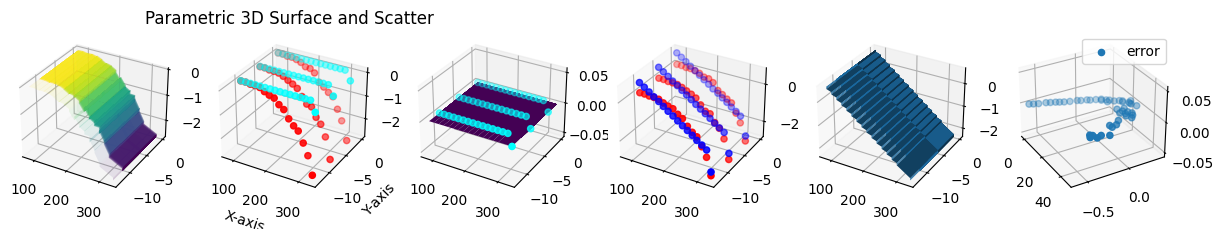

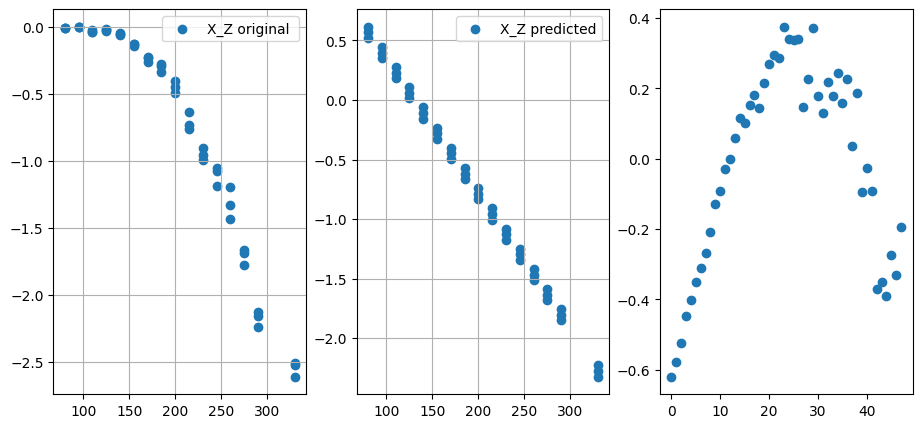

//////// ******************** ///////
Mse is :  0.08620713803960285
-0.7261527518547498 -0.8014941868951755 0.024251853756159795
Formula : z = -0.7261527518547498+-0.8014941868951755x+0.024251853756159795y


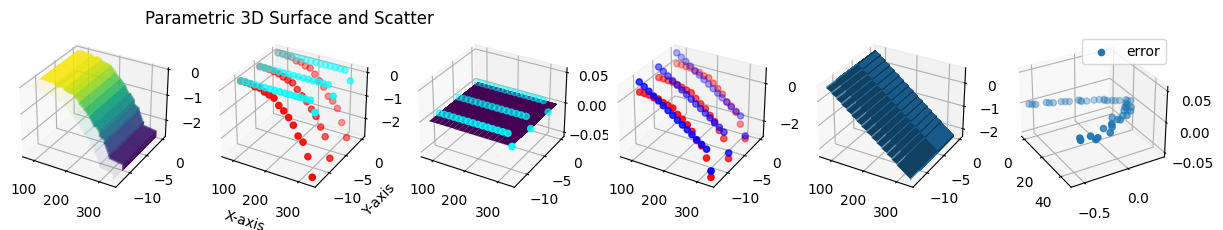

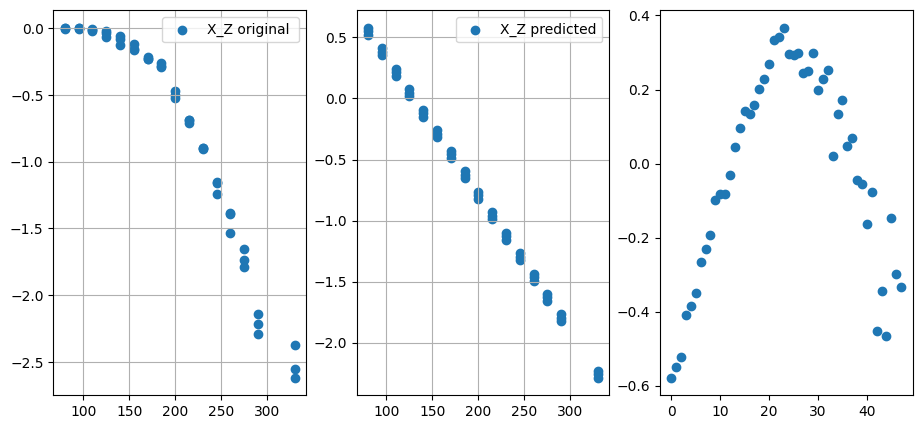

//////// ******************** ///////
Mse is :  0.09438431376917623
-0.712725933883812 -0.7065439066597808 0.03478757913796352
Formula : z = -0.712725933883812+-0.7065439066597808x+0.03478757913796352y


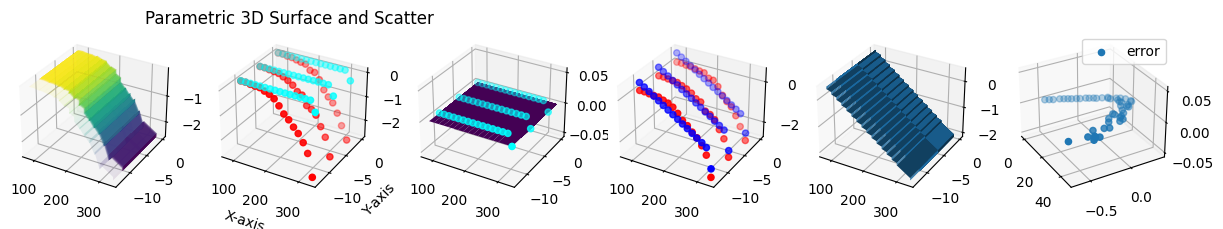

//////// ******************** ///////
Mse is :  0.052525485927070736
-0.7426138152959094 -0.70141437970763 0.004819184914986676
Formula : z = -0.7426138152959094+-0.70141437970763x+0.004819184914986676y


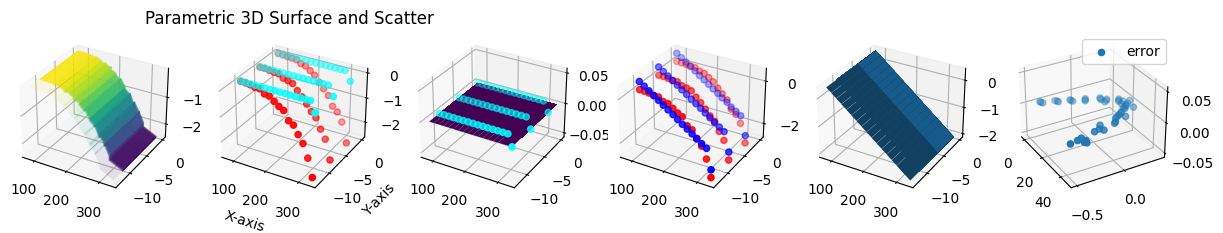

//////// ******************** ///////
Mse is :  0.11928801973313617
-0.7002459034091294 -0.6678137794150006 0.05024343512406678
Formula : z = -0.7002459034091294+-0.6678137794150006x+0.05024343512406678y


//////// ******************** ///////
Mse is :  0.09079276090182727
-0.7370347847953422 -0.6964188914013911 0.0014308273167569854
Formula : z = -0.7370347847953422+-0.6964188914013911x+0.0014308273167569854y


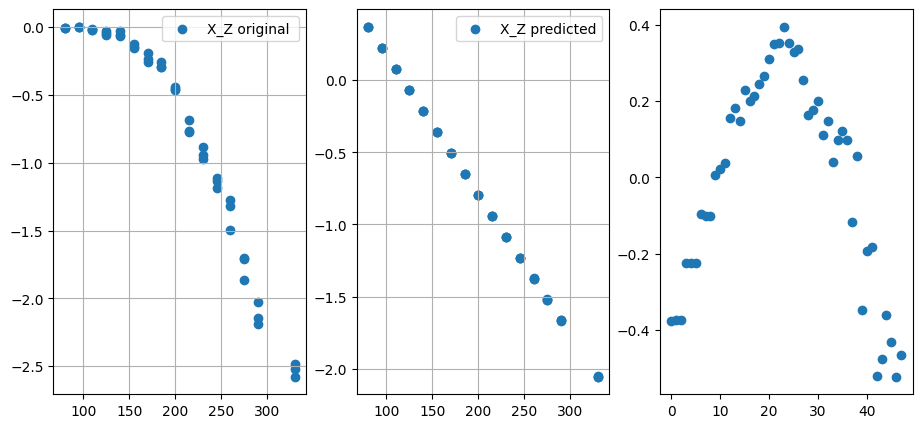

//////// ******************** ///////
Mse is :  0.04135879021156452
-0.7508099696373761 -0.7529505942937051 0.02138040495485803
Formula : z = -0.7508099696373761+-0.7529505942937051x+0.02138040495485803y


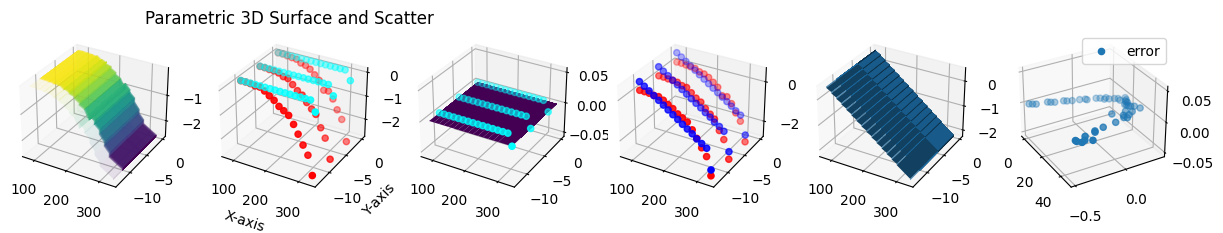

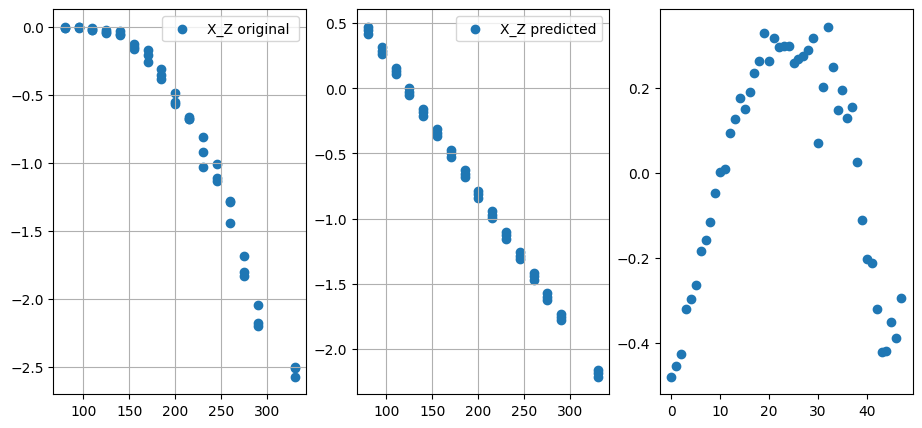

//////// ******************** ///////
Mse is :  0.0529171869658287
-0.7714146779207838 -0.7363560109445516 -0.013711784264095585
Formula : z = -0.7714146779207838+-0.7363560109445516x+-0.013711784264095585y


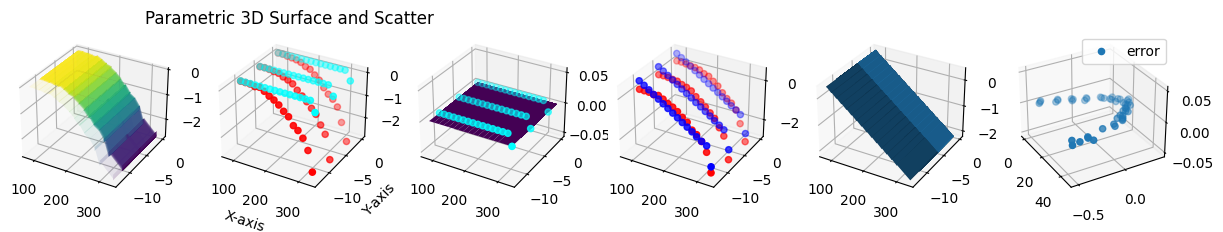

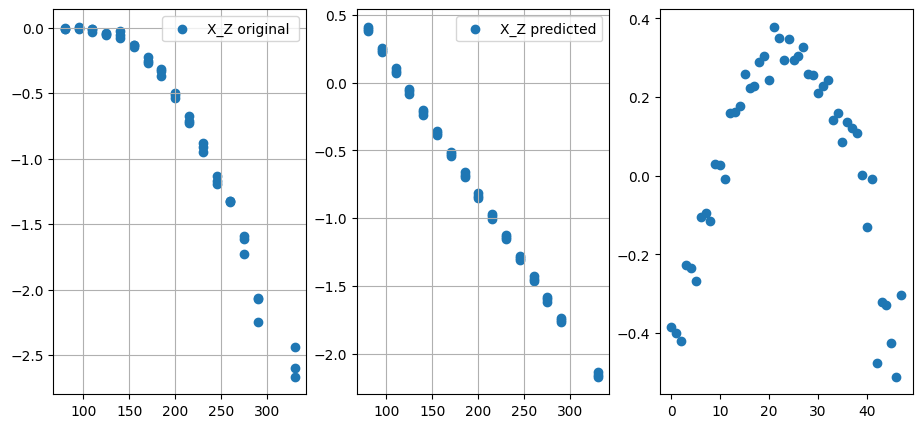

//////// ******************** ///////
Mse is :  0.08927339071123451
-0.7579246677961373 -0.714581526945533 -0.00990639969412513
Formula : z = -0.7579246677961373+-0.714581526945533x+-0.00990639969412513y


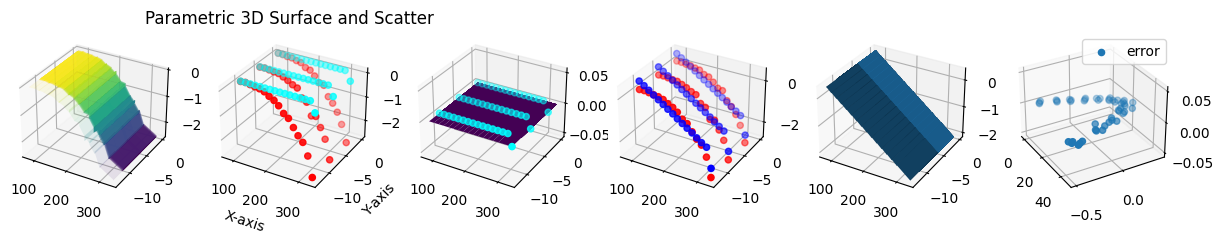

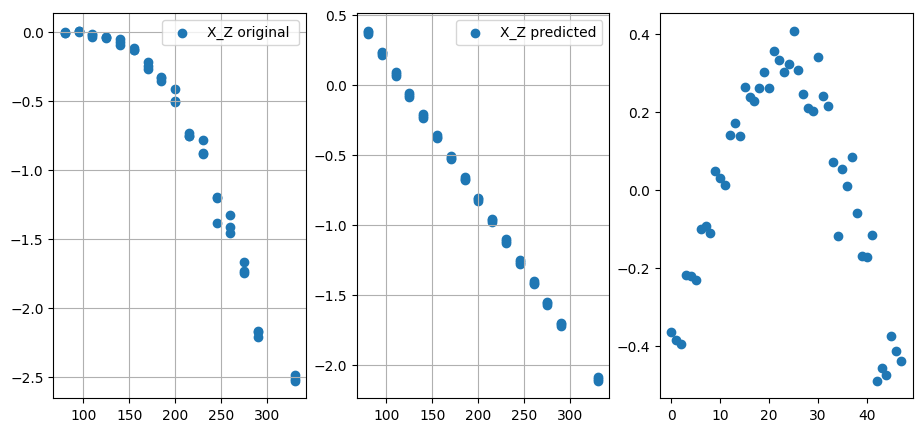

//////// ******************** ///////
Mse is :  0.07860911680433308
-0.7459308919080918 -0.7251968311838379 0.05112567728681829
Formula : z = -0.7459308919080918+-0.7251968311838379x+0.05112567728681829y


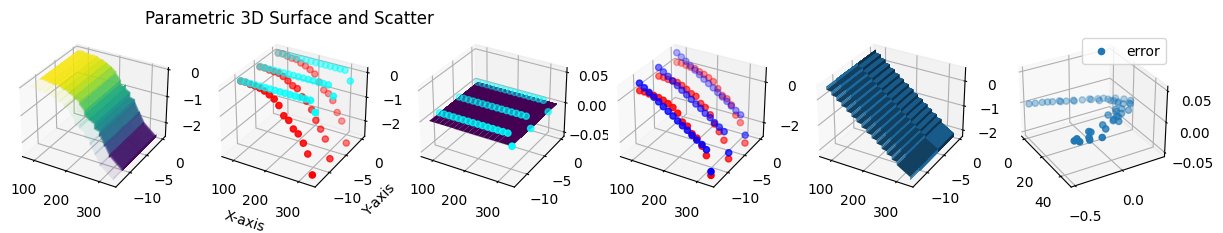

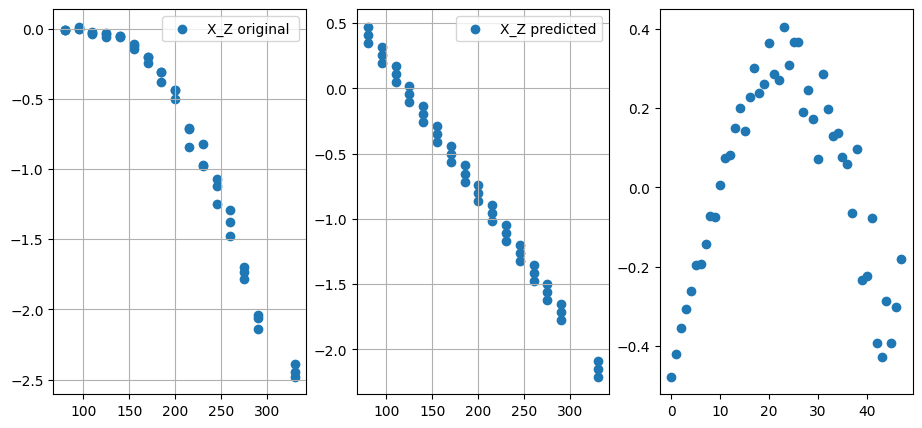

//////// ******************** ///////
Mse is :  0.07457065453205305
-0.7584911261052536 -0.7345048046504162 -0.026748123820008067
Formula : z = -0.7584911261052536+-0.7345048046504162x+-0.026748123820008067y


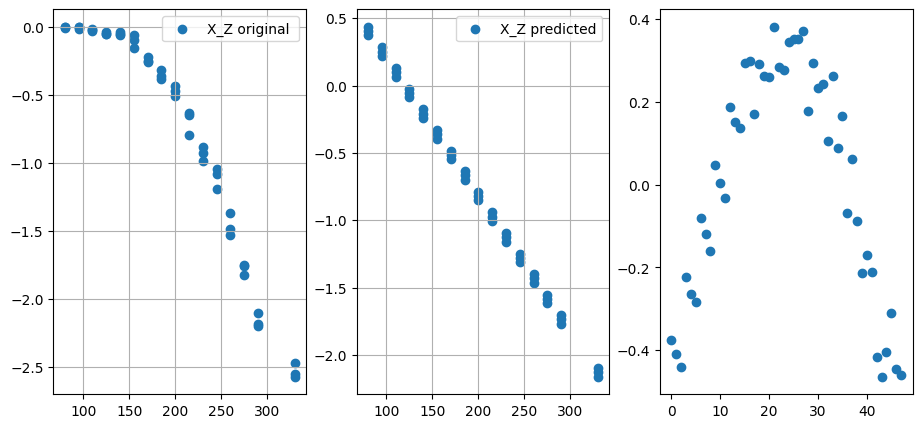

//////// ******************** ///////
Mse is :  0.07017640859351364
-0.7089645072195339 -0.7531007409122541 -0.046849711912316926
Formula : z = -0.7089645072195339+-0.7531007409122541x+-0.046849711912316926y


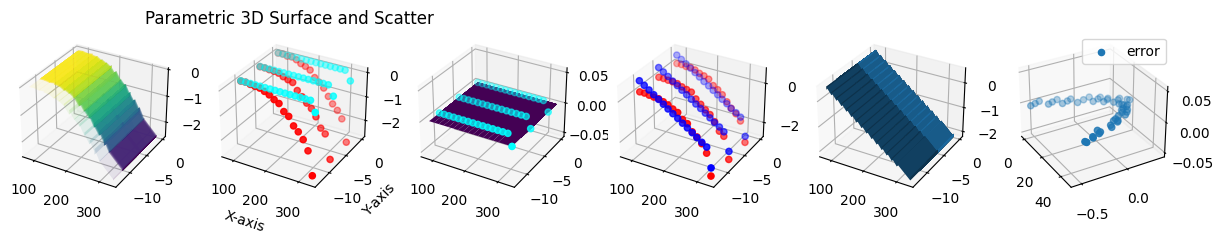

//////// ******************** ///////
Mse is :  0.10960145348516004
-0.7160000881855964 -0.7983309015982725 0.025018700426814863
Formula : z = -0.7160000881855964+-0.7983309015982725x+0.025018700426814863y


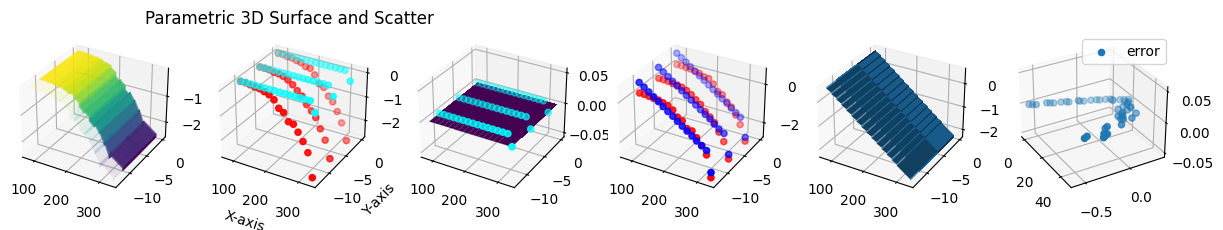

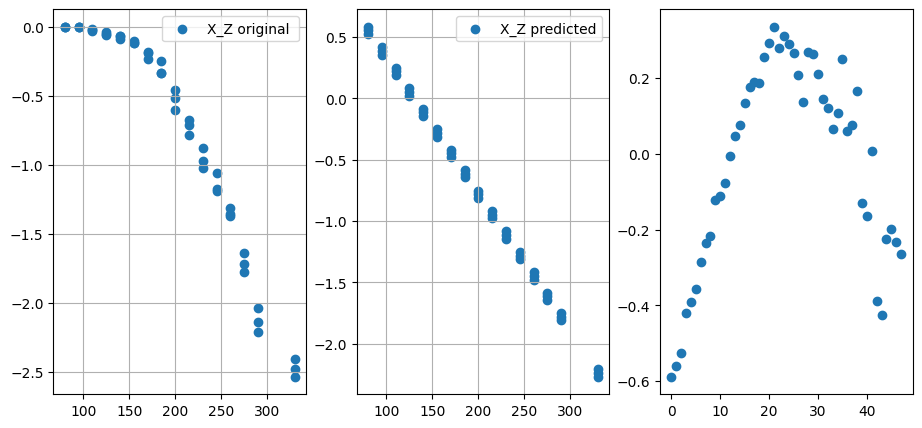

//////// ******************** ///////
Mse is :  0.08220470075553131
-0.7213669293554998 -0.7237662867189386 0.001903784129185478
Formula : z = -0.7213669293554998+-0.7237662867189386x+0.001903784129185478y


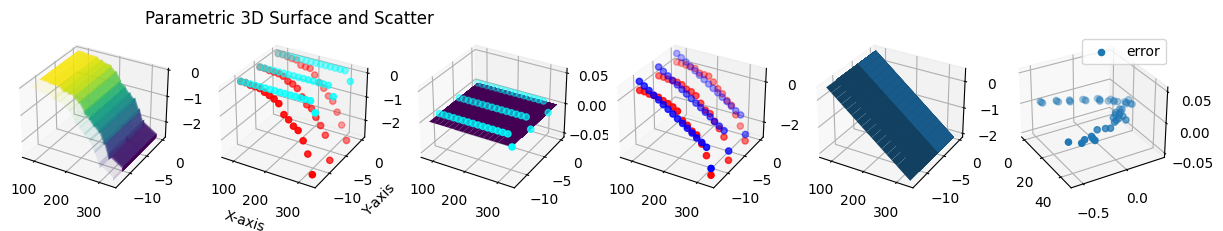

//////// ******************** ///////
Mse is :  0.08417823752470134
-0.7228199316073494 -0.7759487972576531 -0.002745564365767264
Formula : z = -0.7228199316073494+-0.7759487972576531x+-0.002745564365767264y


//////// ******************** ///////
Mse is :  0.0948864246393566
-0.7244672199146772 -0.7581019088985887 -0.0256879632362722
Formula : z = -0.7244672199146772+-0.7581019088985887x+-0.0256879632362722y


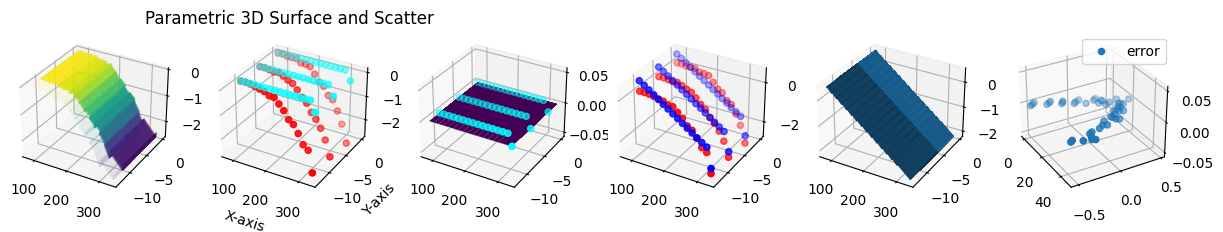

//////// ******************** ///////
Mse is :  0.07073628247245668
-0.7728981471838147 -0.7348058339258193 0.04477658010299444
Formula : z = -0.7728981471838147+-0.7348058339258193x+0.04477658010299444y


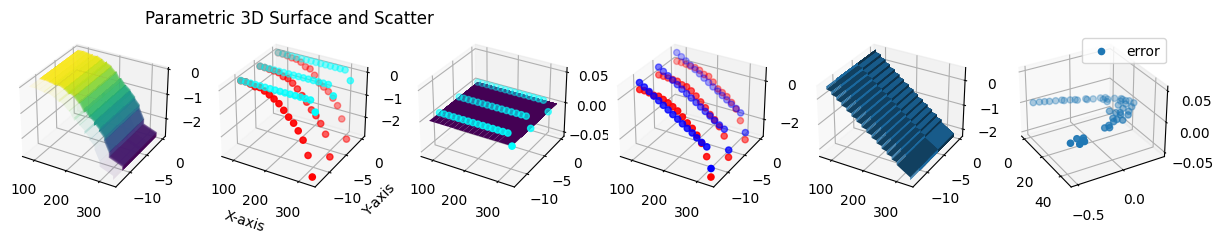

//////// ******************** ///////
Mse is :  0.08131252726957697
-0.7386412653935679 -0.7163166355246241 0.01842706588499405
Formula : z = -0.7386412653935679+-0.7163166355246241x+0.01842706588499405y


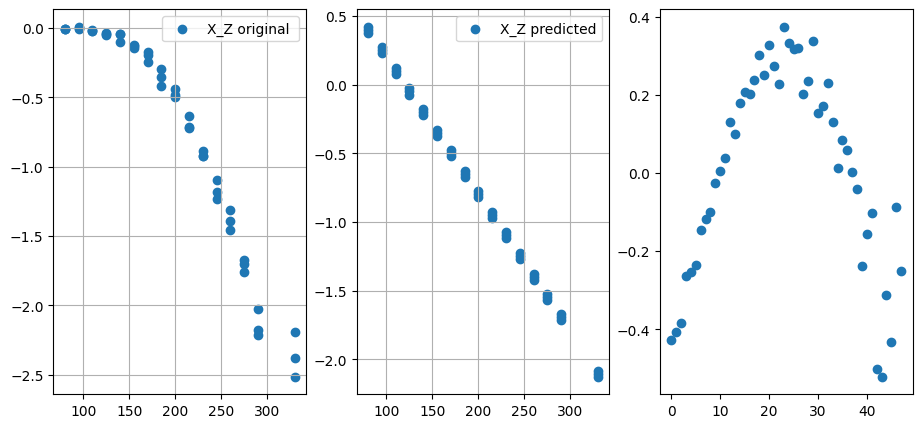

//////// ******************** ///////
Mse is :  0.04566305294068083
-0.7461162492498742 -0.756589723725185 -0.017420705666875026
Formula : z = -0.7461162492498742+-0.756589723725185x+-0.017420705666875026y


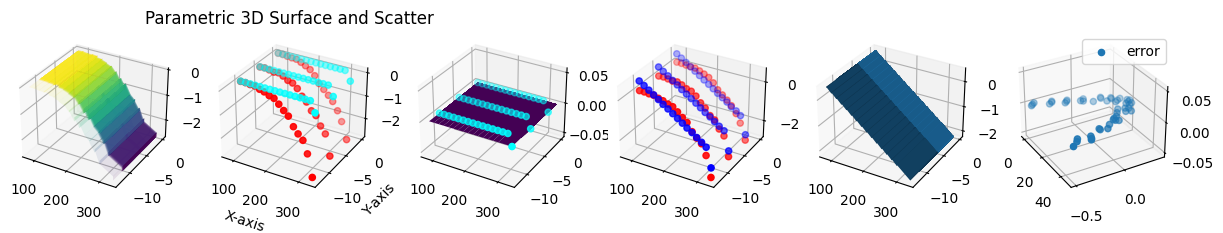

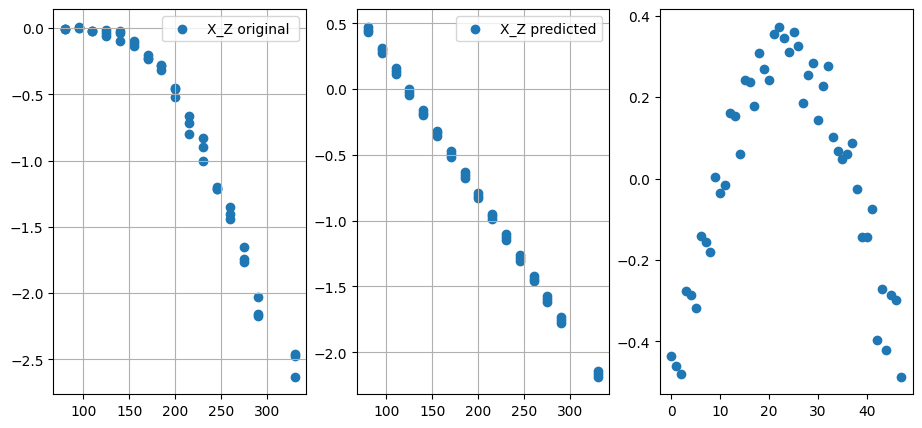

//////// ******************** ///////
Mse is :  0.0656419761173085
-0.7146171416895599 -0.7335171925167098 0.00830560945780036
Formula : z = -0.7146171416895599+-0.7335171925167098x+0.00830560945780036y


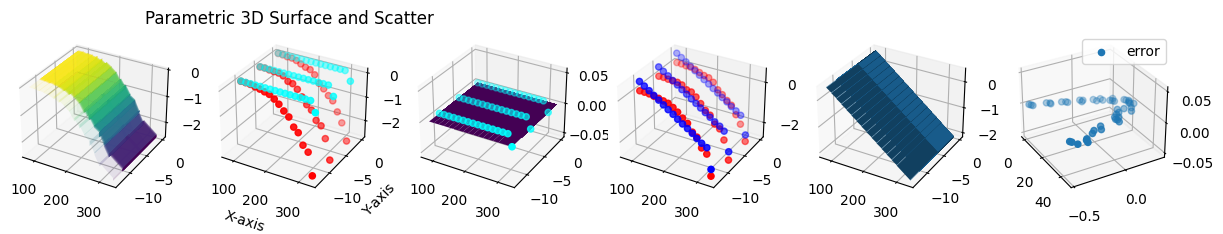

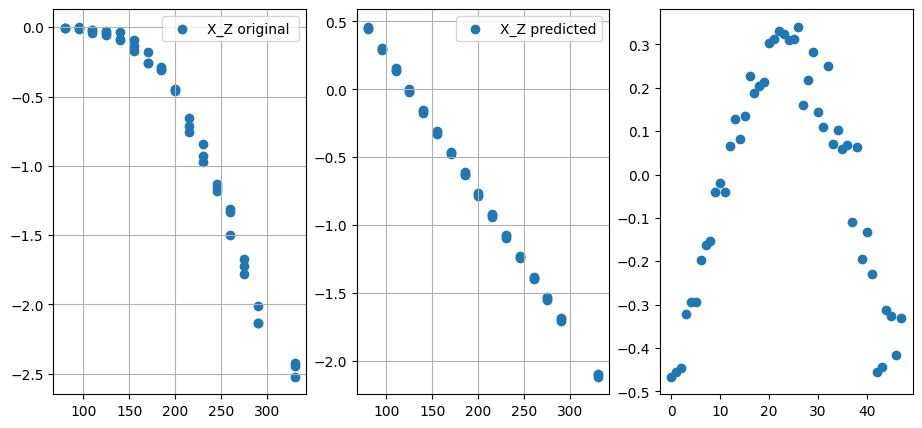

//////// ******************** ///////
Mse is :  0.06271333698501565
-0.7810831563343585 -0.744840288514376 0.030409356986784344
Formula : z = -0.7810831563343585+-0.744840288514376x+0.030409356986784344y


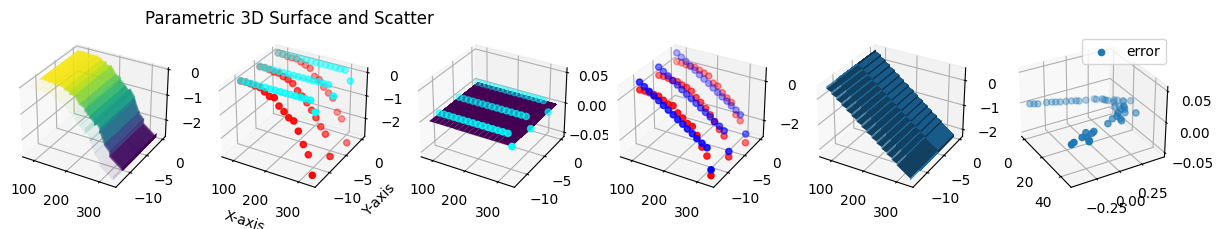

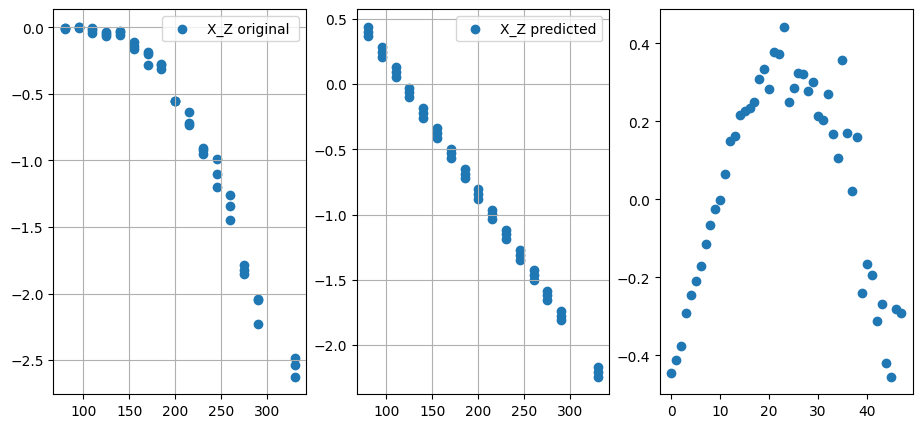

//////// ******************** ///////
Mse is :  0.11471392637501206
-0.7823873268531326 -0.7866123896963493 0.06000817236458377
Formula : z = -0.7823873268531326+-0.7866123896963493x+0.06000817236458377y


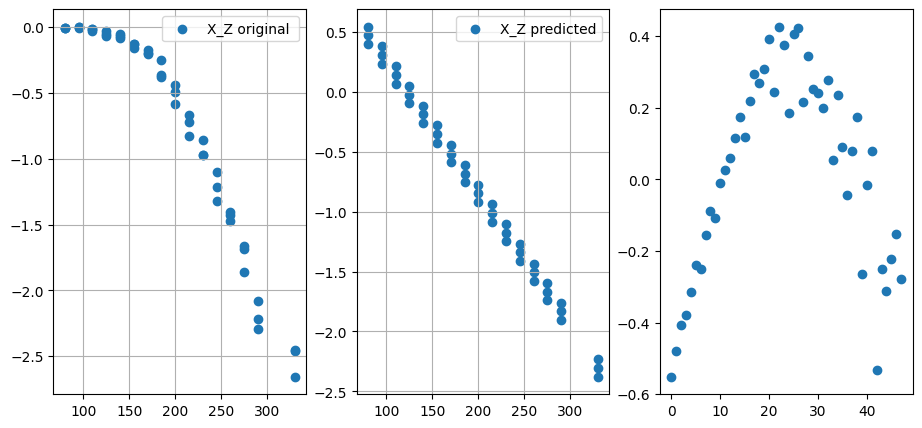

//////// ******************** ///////
Mse is :  0.10418312479653409
-0.7158648503894643 -0.7288901189090166 0.009853392541246363
Formula : z = -0.7158648503894643+-0.7288901189090166x+0.009853392541246363y


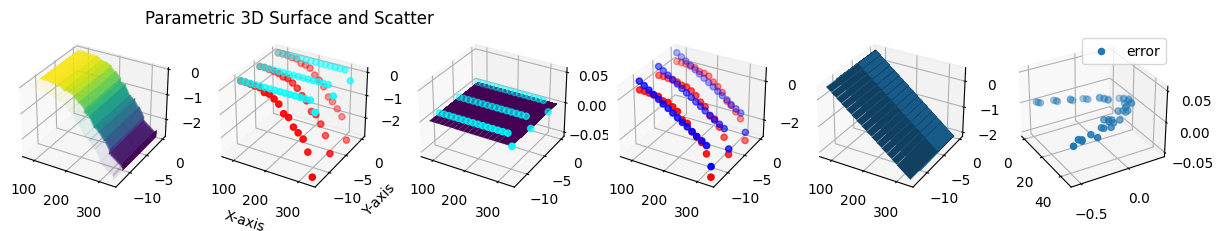

KeyboardInterrupt: 

In [11]:
params = []
for iteration  in range(100) :
  new_data_simulated_from_table_28_24 = []
  for i in range(table_28_24_blade_1.shape[0]) :
    x_mean = table_28_24_blade_1.iloc[ i , 1 ]
    x_std  = table_28_24_blade_1.iloc[ i , 2 ]
    y_mean = table_28_24_blade_1.iloc[ i , 3 ]
    y_std  = table_28_24_blade_1.iloc[ i , 4 ]
    z_mean = table_28_24_blade_1.iloc[ i , 5 ]
    z_std  = table_28_24_blade_1.iloc[ i , 6 ]

    for element in total_points[i*3 : (i+1)*3 , : ] :
      x_sample = element[0]
      y_sample = element[1]
      z_sample = element[2]

      rng = np.random.default_rng()

      x_added = rng.normal(x_mean, x_std , size=1 )
      x_added = x_added.tolist()[0]
      x_sample += x_added

      y_added = rng.normal(y_mean, y_std , size=1 )
      y_added = y_added.tolist()[0]
      y_sample += y_added

      z_added = rng.normal(z_mean, z_std , size=1 )
      z_added = z_added.tolist()[0]
      z_sample += z_added


      new_data_simulated_from_table_28_24.append([x_sample ,y_sample , z_sample ])

  new_data_simulated_from_table_28_24 = np.array(new_data_simulated_from_table_28_24)
  U1, V1 = np.meshgrid(new_data_simulated_from_table_28_24[ : ,  0 ]  , new_data_simulated_from_table_28_24[ : , 1 ] )
  U, V = np.meshgrid(total_points[ : ,  0 ]  , total_points[ : , 1 ] )


  fig = plt.figure(figsize = (15 , 15 ) )


  ax0 = fig.add_subplot(1 , 6 , 1, projection='3d' )
  ax0.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1 , cmap="viridis"  )



  ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )

  # Plotting the parametric 3D surface
  #ax1.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1  )
  ax1.scatter3D(new_data_simulated_from_table_28_24[ : ,  0 ], new_data_simulated_from_table_28_24[ : , 1 ] , new_data_simulated_from_table_28_24[ : , 2  ] , color = "red" )
  ax1.scatter3D(total_points[ : ,  0 ], total_points[ : , 1 ] , total_points[ : , 2  ] , color = "aqua" )


  ax = fig.add_subplot(1 , 6 , 3 , projection='3d' )

  # Plotting the parametric 3D surface
  ax.plot_surface(U, V, total_points[ : ,  2 ].reshape(1 , -1 ) , cmap='viridis' )
  ax.scatter3D(total_points[ : ,  0 ], total_points[ : , 1 ] , total_points[ : , 2  ] , color = "aqua" )


  # Customizing the plot
  ax1.set_xlabel('X-axis')
  ax1.set_ylabel('Y-axis')
  ax1.set_zlabel('Z-axis')
  ax1.set_title('Parametric 3D Surface and Scatter ')







  df = pd.DataFrame()
  df['X_'] = new_data_simulated_from_table_28_24[ : ,  0 ]
  df['Y_'] = new_data_simulated_from_table_28_24[ : ,  1 ]
  df['Z_'] = new_data_simulated_from_table_28_24[ : ,  2 ]

  scaler = StandardScaler()
  df_stander = pd.DataFrame(scaler.fit_transform(df[['X_' , 'Y_']]) , columns = ['X_' , 'Y_'] )
  df_stander['Z_'] = df['Z_']
  x_train , x_test , z_train , z_test  = train_test_split(df_stander[["X_" , "Y_" ]] , df_stander["Z_" ])
  model = LinearRegression()
  model.fit(x_train,z_train )

  z_predict = model.predict(x_test )
  print("Mse is : " , mean_squared_error(z_predict ,z_test ) )

  a = model.intercept_
  b = model.coef_[0]
  c = model.coef_[1]
  print(a , b , c )
  print(f"Formula : z = {a}+{b}x+{c}y")
  params.append([a , b , c  , mean_squared_error(z_predict ,z_test ) ] )

  ax4 = fig.add_subplot(1 , 6 , 4 , projection='3d' )

  # Plotting the parametric 3D surface
  #ax4.plot_surface(U, V, total_points[ : ,  2 ].reshape(1 , -1 ) , cmap='viridis' )
  ax4.scatter3D(df['X_'], df[ 'Y_' ] , df['Z_'] , color = "r" )
  total_new_generate = []
  total_error = []
  for i in range(len(df['X_'])) :
    new_value = a + b * df_stander.iloc[i , 0 ] + c * df_stander.iloc[i , 1 ]
    total_new_generate.append(new_value)
    error = df_stander.iloc[ i , 2 ] - new_value
    total_error.append(error)



  ax4.scatter3D(df['X_'], df[ 'Y_' ] , total_new_generate , color = "b" )


  ax5 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
  U5_meshgrid , V5_meshgrid = np.meshgrid(df['X_'], df[ 'Y_' ])
  ax5.plot_surface( U5_meshgrid , V5_meshgrid , np.array(total_new_generate).reshape(1 , -1 ) )

  ax6 = fig.add_subplot(1 , 6 , 6  ,  projection='3d' )
  ax6.scatter(    range(len(df)) , total_error   , label='error' )
  ax6.legend()
  ax6.view_init(30 , -30 )


  fig2 = plt.figure(figsize = (15 , 5 ))
  ax7 = fig2.add_subplot(141 )
  ax7.scatter(df['X_'] , df[ 'Z_' ] , label='X_Z original ' )
  ax7.legend()
  ax7.grid()


  ax8 = fig2.add_subplot(142 )
  ax8.scatter(df['X_'] , total_new_generate, label='X_Z predicted' )
  ax8.legend()
  ax8.grid()

  ax9 = fig2.add_subplot(143 )
  ax9.scatter(range(len(df)) , total_error   , label='error')

  plt.show()



  print("//////// ******************** ///////")
total_parameters = pd.DataFrame(params)
total_parameters.columns = ['a' , 'b' , 'c' , 'mse' ]



In [ ]:
model

In [ ]:
a_mean = total_parameters['a'].mean()
a_std  = total_parameters['a'].std()

b_mean = total_parameters['b'].mean()
b_std  = total_parameters['b'].std()

c_mean = total_parameters['c'].mean()
c_std  = total_parameters['c'].std()


In [ ]:
total_parameters

In [ ]:
total_parameters

a         b         c       mse
0  -0.747536 -0.718939  0.021534  0.076493
1  -0.772028 -0.770691 -0.018092  0.064233
2  -0.771469 -0.748724  0.023724  0.084647
3  -0.744056 -0.729540  0.034544  0.109466
4  -0.731555 -0.721323 -0.023524  0.086628
..       ...       ...       ...       ...
95 -0.748412 -0.774852  0.044963  0.085069
96 -0.742141 -0.782262  0.007444  0.079962
97 -0.735211 -0.759122  0.007174  0.082759
98 -0.740681 -0.761425  0.039367  0.067042
99 -0.766308 -0.737958  0.009922  0.046558

[100 rows x 4 columns]

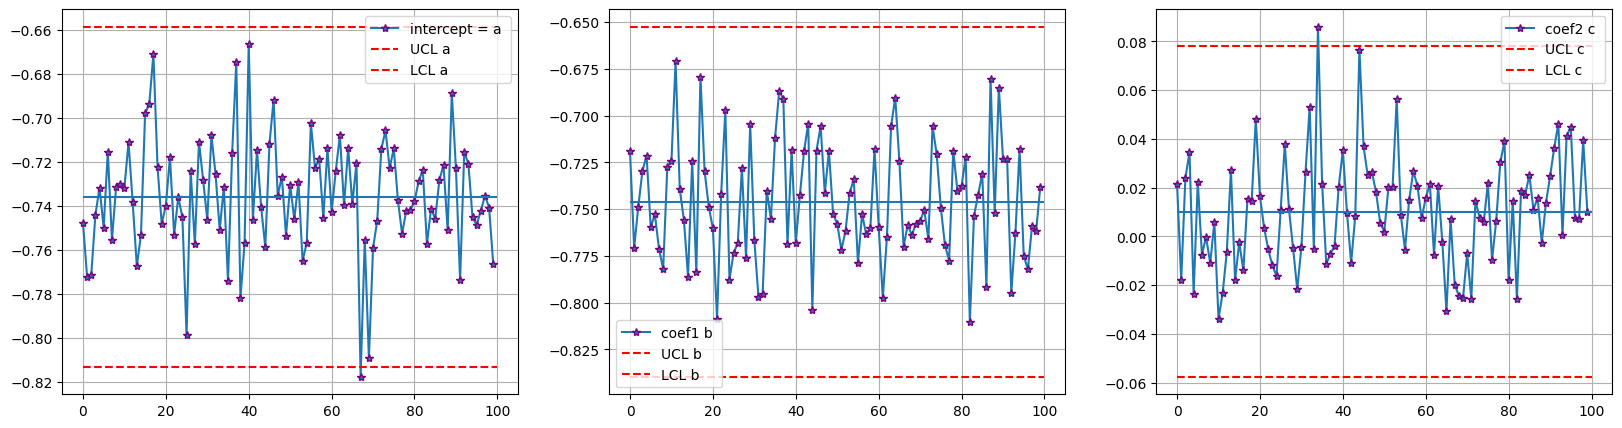

In [ ]:
fig = plt.figure(figsize=(20 , 5))
ax0 = fig.add_subplot(131 )
ax0.plot(total_parameters.a , label='intercept = a ' , marker ='*' , mec='purple')
ax0.hlines(a_mean , xmin = 0 , xmax = 100 )
ax0.hlines(a_mean+3*a_std , xmin = 0 , xmax = 100 , label = 'UCL a' , color ='r' , ls='--')
ax0.hlines(a_mean-3*a_std , xmin = 0 , xmax = 100 , label = 'LCL a' , color ='r' , ls='--')


plt.grid()
plt.legend()

ax1 = fig.add_subplot(132 )
ax1.plot(total_parameters.b , label='coef1 b ' , marker ='*' , mec='purple')
ax1.hlines(b_mean , xmin = 0 , xmax = 100 )
ax1.hlines(b_mean+3*b_std , xmin = 0 , xmax = 100 , label = 'UCL b' , color ='r' , ls='--')
ax1.hlines(b_mean-3*b_std , xmin = 0 , xmax = 100 , label = 'LCL b' , color ='r' , ls='--')
plt.grid()
plt.legend()

ax2 = fig.add_subplot(133 )
ax2.plot(total_parameters.c , label='coef2 c ' , marker ='*' , mec='purple')
ax2.hlines(c_mean , xmin = 0 , xmax = 100 )
ax2.hlines(c_mean+3*c_std , xmin = 0 , xmax = 100 , label = 'UCL c' , color ='r' , ls='--')
ax2.hlines(c_mean-3*c_std , xmin = 0 , xmax = 100 , label = 'LCL c' , color ='r' , ls='--')



plt.grid()
plt.legend()
plt.show()

In [ ]:
x_train.mean()

X_   -0.079806
Y_    0.092492
dtype: float64

In [ ]:
x_train.std()

X_    1.088914
Y_    1.039284
dtype: float64

In [ ]:
total_parameters.head()

a         b         c       mse
0 -0.747536 -0.718939  0.021534  0.076493
1 -0.772028 -0.770691 -0.018092  0.064233
2 -0.771469 -0.748724  0.023724  0.084647
3 -0.744056 -0.729540  0.034544  0.109466
4 -0.731555 -0.721323 -0.023524  0.086628

In [ ]:
total_parameters.iloc[ 4 , 0 ]

-0.7315553482380744

In [ ]:
v_j = []
for index in range(len(total_parameters) - 1 ) :
  value_a =  total_parameters.iloc[index + 1 , 0 ] - total_parameters.iloc[index  , 0 ]
  value_b =  total_parameters.iloc[index + 1 , 1 ] - total_parameters.iloc[index  , 1 ]
  value_c =  total_parameters.iloc[index + 1 , 2 ] - total_parameters.iloc[index  , 2 ]

  v_j.append([value_a , value_b , value_c ])

S_D = (np.array(v_j).T @ np.array(v_j) ) / ( 2 * (len(v_j)) - 1 )



In [ ]:
S_D.shape

(3, 3)

In [ ]:
len(v_j)

99

In [ ]:
mines_z_j = []
for index in range(len(total_parameters) - 1 ) :
  value_a =   total_parameters.iloc[index  , 0 ] - a_mean
  value_b =   total_parameters.iloc[index  , 1 ] - b_mean
  value_c =   total_parameters.iloc[index  , 2 ] - c_mean

  mines_z_j.append([value_a , value_b , value_c ])

mines_z_j = np.array(mines_z_j)

In [ ]:
mines_z_j.shape

(99, 3)

In [ ]:
part1 = np.matmul(mines_z_j , np.linalg.inv(S_D) )

In [ ]:
part1.shape

(99, 3)

In [ ]:
part2 = np.matmul(part1 , mines_z_j.T )

In [ ]:
part2.shape

(99, 99)

In [ ]:
83.5-80.57

2.930000000000007

In [ ]:
7-0.73

6.27

In [ ]:
r1 = np.array([[2.93  , 6.27 ]])

In [ ]:
r2 = np.array([[0.739 , 55.02 ] ,
               [55.02 , 4222.3]])

In [ ]:
r2.shape

(2, 2)

In [ ]:
np.matmul(r1 , r2 )

array([[  347.14067, 26635.0296 ]])

In [ ]:
2.93 * 0.739 + 6.27 * 55.02

347.14067